In [2]:
# import required packages
#import cv2 package
import cv2
#import numpy package
import numpy as np
#import pandas package
import pandas as pd
#import os package
import os
#import seaborn package
import seaborn as sns
#import tensorflow package API
import tensorflow as tf
#import keras package and its necessary modules for training purpose
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from tensorflow.keras.utils import plot_model
# import matplotlib package for plotting purpose
import matplotlib.pyplot as plt

In [3]:
# Initialize image data generator with rescaling
# Normalization
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# initializing training and testing path
train_dir = "data/train/"
test_dir = "data/test/"

# define function to read and count the number of images into the path for each class/emotion
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

# execute the function for counting the images within training set
train_count = count_exp(train_dir, 'train')
# execute the function for counting the images within test set
test_count = count_exp(test_dir, 'test')
# print number of images within each class of training set
print(train_count)
# print number of images within each class of test set
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<AxesSubplot:>

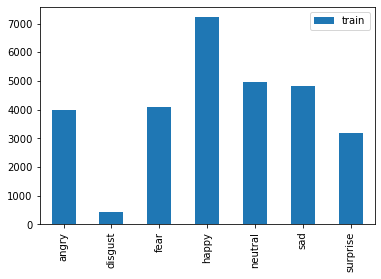

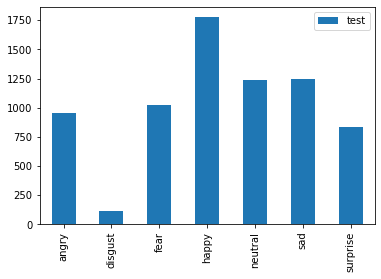

In [5]:
# plot a bar graph for all classes within training set
train_count.transpose().plot(kind='bar')
# plot a bar graph for all classes within test set
test_count.transpose().plot(kind='bar')

In [6]:
# Process training data into bacthes of augmented data using the flow_from_directory function into keras API
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [7]:
# Process test data into bacthes of augmented data using the flow_from_directory function into keras API
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [8]:
# create model structure
emotion_model = Sequential()
# Block 1
# convolutional layer 1
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Block 2
# convolutional layer 2
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Block 3
# convolutional layer 3
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


C:\Users\vinay\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
# Summarize the computed model
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [10]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50
448/448 [==============================] - 683s 2s/step - loss: 1.7893 - accuracy: 0.2679 - val_loss: 1.6876 - val_accuracy: 0.3419
Epoch 2/50
448/448 [==============================] - 303s 677ms/step - loss: 1.6150 - accuracy: 0.3741 - val_loss: 1.5316 - val_accuracy: 0.4093
Epoch 3/50
448/448 [==============================] - 150s 335ms/step - loss: 1.5226 - accuracy: 0.4163 - val_loss: 1.4719 - val_accuracy: 0.4372
Epoch 4/50
448/448 [==============================] - 153s 343ms/step - loss: 1.4567 - accuracy: 0.4420 - val_loss: 1.4083 - val_accuracy: 0.4601
Epoch 5/50
448/448 [==============================] - 150s 334ms/step - loss: 1.3993 - accuracy: 0.4699 - val_loss: 1.3530 - val_accuracy: 0.4863
Epoch 6/50
448/448 [==============================] - 150s 335ms/step - loss: 1.3555 - accuracy: 0.4878 - val_loss: 1.3154 - val_accuracy: 0.4997
Epoch 7/50
448/448 [==============================] - 150s 335ms/step - loss: 1.3086 - accuracy: 0.5046 - val_loss: 1.2876 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


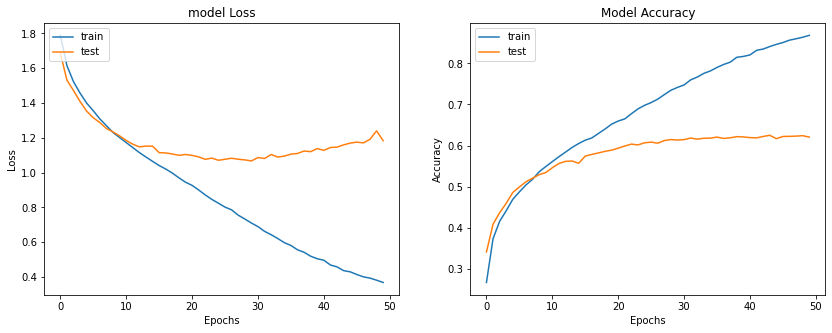

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot the accuracy, validation accuracy, loss and validation loss for training and test dataset
print(emotion_model_info.history.keys())
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("modelloss _modelaccuracy.png")

In [12]:
# Print accuracy for training set
train_loss, train_accu = emotion_model.evaluate(train_generator)
# Print accuracy for test set
test_loss, test_accu = emotion_model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 11s 97ms/step - loss: 1.1827 - accuracy: 0.6211
final train accuracy = 98.55 , validation accuracy = 62.11


In [13]:
# write model structure in json file
model_json = emotion_model.to_json()
# use the write method to write our json weights
# using with loop to write the file
with open("emotion_model.json", "w") as json_file:
    # write the json file
    json_file.write(model_json)

In [14]:
# save trained model weight and the modek in .h5 file
emotion_model.save_weights('emotion_model.h5')
emotion_model.save("model.h5")

Confusion Matrix
[[ 531   62  607 1010  705  646  434]
 [  47    3   67  132   65   76   46]
 [ 627   54  577 1008  677  692  462]
 [1003  103 1004 1808 1296 1201  800]
 [ 678   72  691 1274  871  826  553]
 [ 661   86  687 1175  871  841  509]
 [ 436   53  447  818  556  489  372]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13      3995
     disgust       0.01      0.01      0.01       436
        fear       0.14      0.14      0.14      4097
       happy       0.25      0.25      0.25      7215
     neutral       0.17      0.18      0.17      4965
         sad       0.18      0.17      0.18      4830
    surprise       0.12      0.12      0.12      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



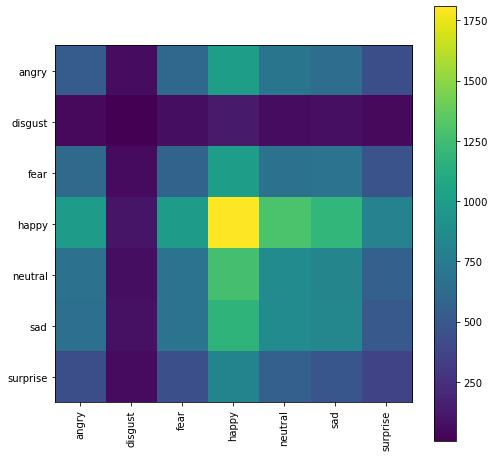

In [15]:
# Confusion Matrix and Classification on training set
y_pred = emotion_model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)
plt.savefig("confusion_matrix_train.png")

Confusion Matrix
[[146  13 120 250 162 150 117]
 [ 14   3  21  33  15  18   7]
 [138  20 147 220 203 153 143]
 [250  24 232 445 349 286 188]
 [163  13 166 336 226 195 134]
 [189  16 150 316 222 211 143]
 [120   5 125 188 153 138 102]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.15      0.15       958
     disgust       0.03      0.03      0.03       111
        fear       0.15      0.14      0.15      1024
       happy       0.25      0.25      0.25      1774
     neutral       0.17      0.18      0.18      1233
         sad       0.18      0.17      0.18      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178



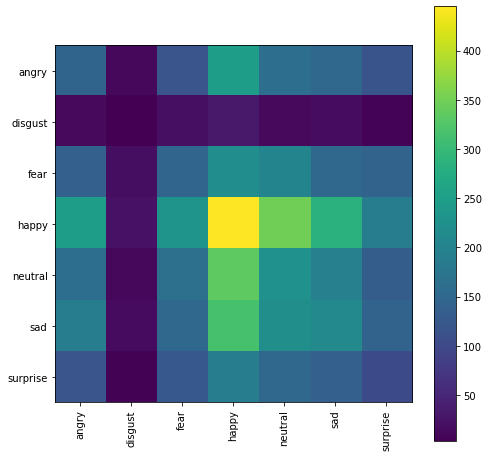

In [16]:
# Confusion Matrix and Classification on test set
y_pred = emotion_model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)
plt.savefig("confusion_matrix_test.png")